In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.tree import export_graphviz

import pydot

from pprint import pprint

<br>

### Reading in & Formatting Data

In [2]:
df_survey = (pd.read_csv('data/survey_clean_final.csv')
             .set_index('Household_id')
             .drop(columns='Unnamed: 0')
                   )
df_survey = df_survey.assign(int_id=[int(x[1:]) for x in df_survey.index])
df_survey.head(10)

,Q234,n_Electric_hob,n_Gas_hob,n_Electric_oven,n_Microwave,n_Washing_machine_no_dryer,n_Tumble_dryer,n_Washer-dryer,n_Dishwasher,n_Electric_shower,...,pt_terraced,pt_terraced_mid,pt_in_commercial,pt_purpose_built_block_tenemant,pt_converted_house_building,sml_hallway,sml_dont_know,sml_living_rm,sml_kitchen,int_id
Household_id,,,,,,,,,,,,,,,,,,,,,
D0000,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
D0001,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
D0002,3,1,0,1,1,1,1,0,1,2,...,0,0,0,0,0,0,0,1,0,2
D0003,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,3
D0004,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,4
D0006,0,0,1,1,1,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,6
D0007,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,7
D0008,1,0,1,1,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,8
D0009,0,1,0,1,1,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,9


In [3]:
df_survey_ToU = df_survey[df_survey.index.unique().str[:1]=='D'].set_index('int_id', drop=True)
df_survey_ToU.index.name = 'id'
df_survey_ToU.head(10)

,Q234,n_Electric_hob,n_Gas_hob,n_Electric_oven,n_Microwave,n_Washing_machine_no_dryer,n_Tumble_dryer,n_Washer-dryer,n_Dishwasher,n_Electric_shower,...,pt_Semi_detached,pt_terraced,pt_terraced_mid,pt_in_commercial,pt_purpose_built_block_tenemant,pt_converted_house_building,sml_hallway,sml_dont_know,sml_living_rm,sml_kitchen
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,1,0,1,1,1,1,0,1,2,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0,0,1,1,1,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
7,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
8,1,0,1,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
9,0,1,0,1,1,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [4]:
df_ToU_responses = (pd.read_csv('data/DSR_deltas.csv')
                    .set_index('id')
                   )
df_ToU_responses.head(10)

,low_delta,high_delta,combined_DRS,DRS_rank
id,,,,
140,0.298468,-0.124587,0.423056,1025
969,0.217026,-0.131711,0.348738,1024
323,0.200940,-0.128602,0.329541,1023
144,0.250917,-0.077235,0.328152,1022
367,0.187738,-0.135560,0.323298,1021
649,0.223205,-0.093347,0.316552,1020
656,0.207729,-0.079527,0.287256,1019
186,0.076935,-0.208825,0.285761,1018
456,0.159227,-0.113751,0.272978,1017


In [5]:
df_std_features = (pd.read_csv('data/std_ts_features_d_format.csv')
                   .rename(columns={'household_id':'id'})
                   .set_index('id')
                  )                    

df_ToU_features = (pd.read_csv('data/ToU_ts_features_d_format.csv')
                   .rename(columns={'household_id':'id'})
                   .set_index('id')
                  )
df_std_features.head(10)

,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,SP_10_var,SP_11_mean,SP_11_var,SP_12_mean,...,drop_not_lunch_combined_mean,drop_weekday_combined_mean,drop_weekday_combined_var,drop_weekend_combined_mean,drop_weekend_combined_var,max,mean,min,var,day/night
id,,,,,,,,,,,,,,,,,,,,,
0,0.547429,0.071353,0.556205,0.070767,0.030682,0.083659,0.005393,0.070262,0.003501,0.062939,...,0.141563,0.144693,0.018692,0.131882,0.016975,1.635,0.135502,0.018,0.017492,0.974170
1,0.334397,0.021818,0.329813,0.021258,0.023734,0.048902,0.000389,0.047346,0.000422,0.046480,...,0.085718,0.100388,0.005887,0.102943,0.006342,0.958,0.102220,0.011,0.006214,1.001680
2,1.517571,0.538666,1.707918,0.695569,0.109754,0.158029,0.005620,0.153047,0.003230,0.159375,...,0.499010,0.535107,0.328721,0.394395,0.167766,4.247,0.434561,0.070,0.217736,1.368112
3,1.617122,0.024445,1.625056,0.017950,0.063637,0.484150,0.378307,0.849179,0.442186,1.022153,...,0.159883,0.208624,0.103362,0.182835,0.094258,1.929,0.190236,0.000,0.097000,0.728489
4,0.634793,0.017399,0.639006,0.015458,0.015368,0.026392,0.000285,0.048804,0.003182,0.106856,...,0.080435,0.123805,0.019891,0.144555,0.022235,0.860,0.138622,0.006,0.021650,0.744428
5,0.340544,0.012871,0.361405,0.018581,0.046984,0.080435,0.000727,0.079944,0.000569,0.078976,...,0.185499,0.173796,0.007608,0.162949,0.005631,0.922,0.166082,0.022,0.006225,1.151703
6,1.091562,0.104647,1.102008,0.122810,0.028629,0.050609,0.005622,0.050826,0.002464,0.052630,...,0.282873,0.276288,0.088907,0.258501,0.070747,2.609,0.263600,0.009,0.076010,1.090320
7,0.864982,0.443054,0.775204,0.379335,0.058878,0.129837,0.005511,0.132389,0.003971,0.141495,...,0.226178,0.154234,0.010045,0.164862,0.026209,2.949,0.161867,0.019,0.021675,1.277079
8,0.407515,0.045317,0.422854,0.045390,0.043719,0.072690,0.000680,0.071845,0.000584,0.068945,...,0.100221,0.131780,0.012159,0.119614,0.008919,1.195,0.123110,0.031,0.009880,0.850190


In [6]:
## Checking the IDs contained in each df are the same and none are missing
a_ids = df_std_features.index
b_ids = df_ToU_responses.index
c_ids = df_survey_ToU.index

print(len(set(a_ids) - set(b_ids)) + len(set(b_ids) - set(a_ids)))
print(len(set(a_ids) - set(c_ids)) + len(set(c_ids) - set(a_ids)))
print(len(set(c_ids) - set(b_ids)) + len(set(b_ids) - set(c_ids)))
df_std_features = df_std_features.drop(list(set(a_ids) - set(b_ids)))
df_std_features = df_std_features.drop(list(set(a_ids) - set(c_ids)))
df_ToU_responses = df_ToU_responses.drop(list(set(b_ids) - set(c_ids)))

0
245
245


In [7]:
## Checking for NaN values
print('ToU Responses:')
print(df_ToU_responses.isnull().sum().sum())
print('')
print('ToU Features:')
print(df_std_features.isnull().sum().sum())
print('')
print('ToU Survey:')
print(df_survey_ToU.isnull().sum().sum())

ToU Responses:
0

ToU Features:
0

ToU Survey:
0


In [8]:
df_features = (df_std_features.copy()
               .join(df_survey_ToU)
              )
response_list = list(df_ToU_responses.columns)
feature_list = list(df_features.columns)

df_ToU = (df_ToU_responses.copy()
          .join(df_features)
         )
df_ToU.to_csv('data/df_ToU.csv')
df_ToU.head(10)

,low_delta,high_delta,combined_DRS,DRS_rank,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,...,pt_Semi_detached,pt_terraced,pt_terraced_mid,pt_in_commercial,pt_purpose_built_block_tenemant,pt_converted_house_building,sml_hallway,sml_dont_know,sml_living_rm,sml_kitchen
id,,,,,,,,,,,,,,,,,,,,,
140,0.298468,-0.124587,0.423056,1025,1.209031,0.490244,1.090893,0.505867,0.036560,0.066126,...,0,0,0,0,1,0,1,0,0,0
969,0.217026,-0.131711,0.348738,1024,1.979500,0.685826,1.984946,0.640269,0.027844,0.044676,...,0,0,0,0,1,0,0,0,1,0
323,0.200940,-0.128602,0.329541,1023,1.705271,0.385953,1.788514,0.364977,0.105587,0.172835,...,0,1,0,0,0,0,0,0,0,1
144,0.250917,-0.077235,0.328152,1022,0.596357,0.185173,0.611358,0.177652,0.057974,0.105217,...,0,0,1,0,0,0,0,0,0,0
656,0.207729,-0.079527,0.287256,1019,1.452321,0.184370,1.485547,0.227647,0.064797,0.134267,...,0,1,0,0,0,0,0,0,0,1
186,0.076935,-0.208825,0.285761,1018,1.802891,0.158895,1.826480,0.167149,0.108202,0.149680,...,0,0,1,0,0,0,0,1,0,0
847,0.156375,-0.111801,0.268175,1016,1.209869,0.298420,1.215270,0.300443,0.035959,0.083618,...,0,0,1,0,0,0,0,0,0,1
423,0.168689,-0.089759,0.258448,1015,1.637021,0.320432,1.669904,0.325384,0.027476,0.178399,...,0,0,0,0,1,0,0,0,0,1
143,0.131981,-0.123658,0.255639,1014,1.174806,0.121448,1.181813,0.135508,0.075731,0.198208,...,1,0,0,0,0,0,0,0,0,1


In [9]:
## Checking combined dataframe has no missing values
df_ToU.isnull().sum().sum()

0

<br>
### Creating Response Groups

In [10]:
s_quartiles = pd.qcut(df_ToU.combined_DRS, 4)

quartiles_map = pd.Series(data=[1, 2, 3, 4], index=s_quartiles.unique().categories.left)

s_quartiles = (s_quartiles
               .apply(lambda x: x.left)
               .map(quartiles_map)
              )

s_quartiles.head(10)

id
140    4
969    4
323    4
144    4
656    4
186    4
847    4
423    4
143    4
693    4
Name: combined_DRS, dtype: int64

In [11]:
df_ToU_grouped = (df_features.copy()
                  .assign(quartile=s_quartiles)
                 )

df_ToU_grouped.to_csv('data/df_ToU_grouped.csv')
df_ToU_grouped.head(10)

,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,SP_10_var,SP_11_mean,SP_11_var,SP_12_mean,...,pt_terraced,pt_terraced_mid,pt_in_commercial,pt_purpose_built_block_tenemant,pt_converted_house_building,sml_hallway,sml_dont_know,sml_living_rm,sml_kitchen,quartile
id,,,,,,,,,,,,,,,,,,,,,
0,0.547429,0.071353,0.556205,0.070767,0.030682,0.083659,0.005393,0.070262,0.003501,0.062939,...,0,0,0,1,0,0,1,0,0,3
1,0.334397,0.021818,0.329813,0.021258,0.023734,0.048902,0.000389,0.047346,0.000422,0.046480,...,0,0,0,1,0,0,0,0,1,2
2,1.517571,0.538666,1.707918,0.695569,0.109754,0.158029,0.005620,0.153047,0.003230,0.159375,...,0,0,0,0,0,0,0,1,0,1
3,1.617122,0.024445,1.625056,0.017950,0.063637,0.484150,0.378307,0.849179,0.442186,1.022153,...,0,0,0,1,0,0,0,1,0,4
4,0.634793,0.017399,0.639006,0.015458,0.015368,0.026392,0.000285,0.048804,0.003182,0.106856,...,0,1,0,0,0,0,0,1,0,1
6,1.091562,0.104647,1.102008,0.122810,0.028629,0.050609,0.005622,0.050826,0.002464,0.052630,...,1,0,0,0,0,0,1,0,0,1
7,0.864982,0.443054,0.775204,0.379335,0.058878,0.129837,0.005511,0.132389,0.003971,0.141495,...,0,0,0,1,0,0,0,0,1,1
8,0.407515,0.045317,0.422854,0.045390,0.043719,0.072690,0.000680,0.071845,0.000584,0.068945,...,1,0,0,0,0,0,0,0,1,3
9,1.095656,0.272893,1.146281,0.262165,0.063917,0.126243,0.001990,0.145793,0.002621,0.157916,...,1,0,0,0,0,0,0,0,0,1


(-0.05, 0.25)

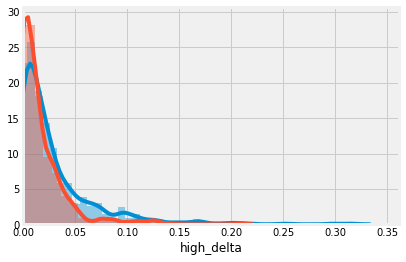

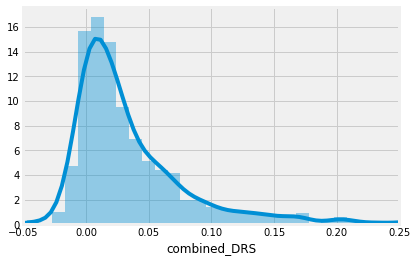

In [15]:
plt.figure()
sns.distplot(df_ToU.low_delta)
#plt.xlim(-0.05, 0.25)

plt.figure()
sns.distplot(-df_ToU.high_delta)
#plt.xlim(-0.05, 0.25)

plt.figure()
sns.distplot(df_ToU.combined_DRS)
plt.xlim(-0.05, 0.25)

In [13]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

gini_low = gini(df_ToU[df_ToU.low_delta>0].low_delta.values)
gini_high = gini(df_ToU[-df_ToU.high_delta>0].high_delta.values)

print(gini_low)
print(gini_high)

0.5514550909826327
0.058114483560029
